# 7 テキストデータの処理


## 7.1 文字列として表現されているデータのタイプ
* テキストはデータセット上は単なる文字列として表現されるが、すべての文字列特徴量が、テキストデータとして扱うべきものではない（データの中身を見ないと文字列特徴量をどう扱うべきかはわからない）
* 文字列データには次の4つがある
    * カテゴリデータ（ドロップダウンメニューなどの固定されたリストから得られるデータ）
    * 意味的にはカテゴリに分類できる自由に書かれた文字列（テキストフィールドから得られる回答）
    * 構造化された文字列（住所や地名。人名。日付、電話番号、何らかの識別番号など）
    * テキストデータ（ツイート、チャットログ。ホテルのレビュー、シェークスピアの全集、Wikipediaの記事全体など）
* テキスト解析においては、データセットはコーパス（corpus）、1つのテキストとして表現される個々のデータポイントは文書（document）と呼ばれる
* これらの用語は、主にテキストデータを取り扱っている情報検索（information retrieval: IR）や自然言語処理（natural language processing: NLP）のコミュニティから来たもの

## 7.2 例題アプリケーション：映画レビューのセンチメント分析
* スタンフォード大学の研究者Andrew Maasが収集したIMDb（Internet Movie Database）Webサイトの映画レビューデータセットを用いる  
http://ai.stanford.edu/~amaas/data/sentiment/

In [10]:
from sklearn.datasets import load_files

reviews_train=load_files("data/aclImdb/train/")
# load_filesは一連の訓練テキストと訓練ラベルを返す
text_train,y_train=reviews_train.data,reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text train[1]:\n{}".format(text_train[1]))

type of text_train: <class 'list'>
length of text_train: 25000
text train[1]:
b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decisio

* レビューにはHTMLの改行シーケンス（\<br />）が含まれている場合があるので、先に進む前に取り除いてデータをきれいにする

In [12]:
text_train=[doc.replace(b"<br />",b" ") for doc in text_train]

* 文字列とユニコードの関係については下記を参考  
https://docs.python.org/3/howto/unicode.html

In [11]:
import numpy as np
print("Samples per class (training): {}".format(np.bincount(y_train)))

Samples per class (training): [12500 12500]


* このデータセットは肯定的なクラスと否定的なクラスがバランスするように集められているので、肯定的、否定的の両方に多数の文字列がある

In [12]:
reviews_test=load_files("data/aclImdb/test/")
text_test,y_test=reviews_test.data,reviews_test.target
print("Number of documents in test data: {}".format(len(y_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))
text_test=[doc.replace(b"<br />",b" ") for doc in text_test]

Number of documents in test data: 25000
Samples per class (test): [12500 12500]


* テキストデータが機械学習が扱えるような形式になっていないため、テキストの文字列表現を機械学習のアルゴリズムを適用できるような数値表現に変換する必要がある


## 7.3 Bag of Wordsによるテキスト表現
* 最も単純で効率がよく、機械学習で用いられているテキストデータ表現がBoW（bag-of-words）表現
* この表現では、章立て、パラグラフ、文章、フォーマット等の入力テキストの持つ構造の殆どずべてが失われ、コーパスに現れた単語がテキストに現れる回数だけが数えられる（テキストを単語に入れる「袋（bag）」と考える）
* 文章の集合であるコーパスに対してBoW表現を計算するには次の3ステップが必要になる
    * トークン分割（Tokenization）:  
        個々の文書を単語に分割する.例えばホワイトスペースや句読点で区切る.
    * ボキャブラリ構築（Vocabulary building）:  
        すべての文書に現れるすべての単語をボキャブラリとして集め、番号をつける（例えばアルファベット順で）
    * エンコード：  
        個々の文書に対してボキャブラリの単語が現れる回数を数える
* 出力は1つの文書に対して、1つの単語数ベクトルになる
* もとの文字列での単語の順番はBoW特徴量表現にはまったく反映されないことに注意

### 7.3.1 トイデータセットに対するBoW
* まず2つのサンプルデータからなるトイデータセットで試してみる


In [13]:
bards_words=[
    "The fool doth think he is wise,",
    "but the wise man knows himself to be a fool"
    ]

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

* CountVectorizerのfitでは、訓練データのトークン分割とボキャブラリの構築が行われる
* ボキャブラリはvocabulary_属性で確認できる

In [15]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n{}".format(vect.vocabulary_))

Vocabulary size: 13
Vocabulary content:
{'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [16]:
bag_of_words=vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


* BoW表現はScipyの疎行列として格納されている（ほとんどの文書にはボキャブラリ中の単語のごく一部しか現れず、特徴量に対する要素のほとんどが０になるから）
* この行列は2×13で、２つのデータポイントに対してそれぞれ行が割当てられ、ボキャブラリ中の単語に対してそれぞれ特徴量が割り当てられている
* 疎行列の内容を見るには、toarrayメソッドを用いて「密な」Numpy行列（こちらは０をそのまま格納する）に変換すればよい

In [17]:
print("Dence representation of bag_of_words:\n{}".format(bag_of_words.toarray()))

Dence representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


### 7.3.2 映画レビューのBoW

In [18]:
vect=CountVectorizer().fit(text_train)
X_train=vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


* ボキャブラリにアクセスするもう一つの方法が、CountVectorizerのget_feature_nameであり、このメソッドは個々の特徴量に対応するエントリのリストを返す

In [19]:
feature_names=vect.get_feature_names()
print("NUmber of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

NUmber of features: 74849
First 20 features:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
Features 20010 to 20030:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
Every 2000th feature:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


* 特徴量抽出を改良する前に、クラス分類器を実際に構築して、性能の定量的な指標を得ておく
* このような高次元の疎なデータに対しては、LogisticRegressionのような線形モデルが有効

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores=cross_val_score(LogisticRegression(max_iter=10000),X_train,y_train,cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.88


* 交差検証でチューニング

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10,100]}
grid=GridSearchCV(LogisticRegression(max_iter=10000),param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ",grid.best_params_)

Best cross-validation score: 0.89
Best parameters:  {'C': 0.1}


In [23]:
X_test=vect.transform(text_test)
print("{:.2f}".format(grid.score(X_test,y_test)))

0.88


* CountVectorizerはトークンを正規表現を用いて抽出する（デフォルトの正規表現は\"\b\w\w+\b"となっている）
* この正規表現は少なくとも２つの文字または数字（\w）が、単語境界（\b）で区切られたものをすべて見つけ出す
* CountVectorizerはすべての単語を小文字にする
* これらの仕掛けは非常にうまく機能するが、数字のような情報量のない特徴量がたくさん得られてしまう（意味のわからない単語やスペルミスなども含まれる）
* これを解決する方法の１つが、２つ以上の文書に登場しているトークンだけを用いるようにすること（２つだけでなくもっと増やしても良い）
* トークンとして採用されるために現れるべき単語数をmin_dfパラメータで設定することができる


In [24]:
vect=CountVectorizer(min_df=5).fit(text_train)
X_train=vect.transform(text_train)
print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [25]:
feature_names=vect.get_feature_names()
print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
Features 20010 to 20030:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
Every 700th feature:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciati

In [26]:
grid=GridSearchCV(LogisticRegression(max_iter=10000),param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.89


* 特徴量の数が減ることで処理が高速になり、不要な特徴量がなくなることでモデルをより理解しやすくなった

## 7.4 ストップワード
* 役に立たない単語を取り除くもう一つの方法として、あまりに頻出するため役に立たない単語を捨てる方法があり、これには２つの手法がある
* 言語固有のストップワードリストを作っておく方法
* 頻度の高い単語を捨てる方法

In [28]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop word: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop word: 318
Every 10th stopword:
['across', 'detail', 'ever', 'when', 'anyway', 'yourselves', 'un', 'through', 'above', 'cant', 'show', 'mostly', 'top', 'the', 'by', 'their', 'at', 'an', 'go', 'put', 'again', 'been', 'sixty', 'throughout', 'onto', 'whence', 'during', 'whoever', 'himself', 'seemed', 'moreover', 'whereas']


In [29]:
# stop_words="english"を指定すると、組み込みのストップワードリストを用いる
# ストップワードリストに単語を追加したり、独自のものを使うこともできる
vect=CountVectorizer(min_df=5,stop_words="english").fit(text_train)
X_train=vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [30]:
grid=GridSearchCV(LogisticRegression(max_iter=10000),param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.88


##### 頻度の高い単語を捨てる方法

In [50]:
vect=CountVectorizer(max_df=10000).fit(text_train)
X_train=vect.transform(text_train)
print("X_train with max_df: {}".format(repr(X_train)))

X_train with max_df: <25000x74808 sparse matrix of type '<class 'numpy.int64'>'
	with 2807879 stored elements in Compressed Sparse Row format>


In [51]:
grid=GridSearchCV(LogisticRegression(max_iter=10000),param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.89


In [43]:
vect=CountVectorizer(max_df=10000,min_df=5).fit(text_train)
X_train=vect.transform(text_train)
print("X_train with max_df: {}".format(repr(X_train)))

X_train with max_df: <25000x27230 sparse matrix of type '<class 'numpy.int64'>'
	with 2730697 stored elements in Compressed Sparse Row format>


In [44]:
grid=GridSearchCV(LogisticRegression(max_iter=10000),param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.89


In [45]:
vect=CountVectorizer(max_df=10000,min_df=5,stop_words="english").fit(text_train)
X_train=vect.transform(text_train)
print("X_train with max_df: {}".format(repr(X_train)))

X_train with max_df: <25000x26962 sparse matrix of type '<class 'numpy.int64'>'
	with 2098473 stored elements in Compressed Sparse Row format>


In [46]:
grid=GridSearchCV(LogisticRegression(max_iter=10000),param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.88


* ストップワードは小さいデータセットに関しては有効（大きいデータセットではあまり有効ではない） 

## 7.5 tf-idfを用いたデータのスケール変換
* 重要でなさそうな特徴量を落とすのではなく、特徴量がどの程度情報を持っていそうかに応じて、特徴量のスケールを変換する手法がある
* これの最も一般的な手法が、tf-idf（term frequency-inverse document frequency）
* この手法は、特定の文書にだけ頻繁に現れる単語に大きな重みを与え、コーパス中の多数の文書に現れる単語にはあまり重みを与えない（特定の文書にだけ頻出し、他の文書にはあまり現れない単語は、その文書の内容をよく示しているのではないか、という考え）
* scikit-learnのTfidfTransformerはCountVectorizerの生成する疎行列を入力とする
* TfidfVectorizerはテキストデータを入力とし。BoW特徴量抽出とtf-idf変換を行う
* 文書$d$における単語$w$のtf-idfスコアは下のように与えられる
$$
\mathrm{tfidf}(w,d)=tf\left(\log \left(\dfrac{N+1}{N_w+1}\right)+1\right)
$$
* $N$は訓練セット中の文書の数、$N_w$は訓練セット中の$w$が現れる文書の数、$tf$（term frequency）は対象の文書$d$（変換を行う文書）中に$w$が現れる回数
* ２つのクラスはいずれも、tf-idf表現を計算したあとでL2正規化を行う（各文書の個々の特徴量を、その文書のすべての特徴量の二乗和の平方根で割る.つまり、それぞれの文書の表現の長さが、ユークリッド長で１になるようにスケール変換する.）
* このように変換すると、文書の長さ（単語数）がベクトル表現に影響を与えなくなる
* tf-idfは訓練データの統計的性質を利用するので、パイプラインを用いてグリッドサーチの結果が有効になるようにする

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(TfidfVectorizer(min_df=5,norm=None),LogisticRegression(max_iter=10000))
param_grid={'logisticregression__C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(pipe,param_grid=param_grid,cv=5)
grid.fit(text_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.89


* この場合はtf-idf変換を行っても性能は向上しなかったが、tf-idf変換を用いると性能がよくなることがある
* tf-idfがどの単語が重要だと判断したかを見ることもできる（tf-idfによるスケール変換は、文書を区別するためのものだが、純粋に教師なしの手法であることに留意する）
* tf-idfでの「重要さ」は本来の興味の対象である「肯定的なレビュー」「否定的なレビュー」のラベルには必ずしも関係しない

In [54]:
# パイプラインからTfidfVectorizerを取り出す
vectorizer=grid.best_estimator_.named_steps['tfidfvectorizer']

# 訓練データセットを変換
X_train=vectorizer.transform(text_train)

# それぞれの特徴量のデータセット中での最大値を見つける
max_value=X_train.max(axis=0).toarray().ravel()
sorted_byidf=max_value.argsort()

# 特徴量名を取得
feature_names=np.array(vectorizer.get_feature_names())

print("Features with lowest tfidf:\n{}".format(feature_names[sorted_byidf[:20]]))
print("Features with highest tfidf:\n{}".format(feature_names[sorted_byidf[-20:]]))

Features with lowest tfidf:
['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'fond'
 'stinker' 'avoided' 'emphasis' 'commented' 'disappoint' 'realizing'
 'downhill' 'inane']
Features with highest tfidf:
['coop' 'homer' 'dillinger' 'hackenstein' 'gadget' 'taker' 'macarthur'
 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor' 'bridget' 'victoria'
 'khouri' 'zizek' 'rob' 'timon' 'titanic']


* tf-idfが低い特徴量は、多くの文書に共通して出現するか、あまり出現しないか、もしくは非常に長い文書にしか出現しないか、といった特徴量になっている
* tf-idfが高い特徴量の多くは、特定の映画を指している（センチメント分析タスクにはあまり役に立たないが、たしかにそのレビューに固有の情報をたくさん含んでいる）
* 文書頻度の逆数（inverse document frequency: idf）が小さい単語（高い頻度で現れるため重要でないと考えられる単語）を見つけることもできる
* 訓練セットに対する文書頻度の逆数はidf_属性に格納されている

In [55]:
sorted_by_idf=np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


* これらの殆どは英語のストップワードになっているが、いくつかは明らかに映画レビューの固有の単語になっている
* ここでは、センチメント分析タスクに非常に重要と思われる"good","great","bad"などの単語が、多くの文書に頻出するために、tf-idfの尺度では、「最も関連性が低い」と判断されてしまっている

## 7.6 モデル係数の調査
* ロジスティック回帰モデルの敬意数が最も大きい25の特徴量と最も小さい25の特徴量をグラフで示す

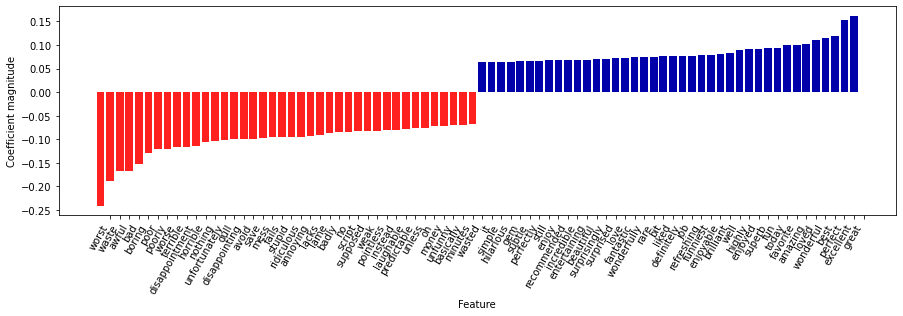

In [56]:
import mglearn

mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_,feature_names,n_top_features=40)

* "worst","waste","disappointment"などが否定的なレビューを、"excellent","wonderful","enjoyable","refreshing"などが肯定的なレビューを指している

## 7.7 1単語よりも大きい単位のBag-of-Words（n-グラム）
* BoW表現の問題は単語の順番が完全に失われること
* テキストに現れる単一のトークンだけを考えるのではなく、2つ（バイグラム,bigram）もしくは3つ（トリグラム,trigram）の連続するトークンの列を考える
* 一般にトークンの列をn-グラム（n-gram）と呼ぶ
* 特徴量と考えるトークンの列の長さを変更するには、CountVectorizerやTfidfVectorizerのngram_rangeパラメータを設定する

In [57]:
print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


* デフォルトでは、特徴量とするトークン列の長さは最小1、最大1となっている（個々のトークンが特徴量となる（トークン1つをユニグラム（unigram）と呼ぶ））

In [58]:
cv=CountVectorizer(ngram_range=(1,1)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 13
Vocabulary:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


* バイグラム、つまり連続する2つのトークンだけを見るには、ngram_rangeを（2,2）に設定すれば良い

In [59]:
cv=CountVectorizer(ngram_range=(2,2)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 14
Vocabulary:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


* 対象とするトークン列の長さを長くすると特徴量の数が増大し、特定的な特徴量となる

In [60]:
print("Transformed data (dense):\n{}".format(cv.transform(bards_words).toarray()))

Transformed data (dense):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


* ほとんどのアプリケーションでは、トークン列の最小長は1にしたほうが良い（一つの単語でも相当な意味を持つ場合が多いため）
* 殆どの場合バイグラムを加えると性能が向上し、5-グラムぐらいまでは性能向上につながる可能性があるが、特徴量の数が爆発するし。特定的な特徴量が増えるため、過剰適合の可能性も高くなる

In [61]:
cv=CountVectorizer(ngram_range=(1,3)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 39
Vocabulary:
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


* グリッドサーチを使って、IMDb映画レビューデータに対してTfidfVectorizerを用いてn-グラムのレンジの最良値を探索してみる

In [62]:
pipe=make_pipeline(TfidfVectorizer(min_df=5),LogisticRegression(max_iter=10000))
# グリッドが比較的大きい上、トリグラムが含まれているので、このグリッドサーチの実行にはかなり時間がかかる
param_grid={"logisticregression__C":[0.001,0.01,0.1,1,10,100],"tfidfvectorizer__ngram_range":[(1,1),(1,2),(1,3)]}
grid=GridSearchCV(pipe,param_grid=param_grid,cv=5)
grid.fit(text_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.91
Best parameters:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


* バイグラム特徴量とトリグラム特徴量を加えることで、1%以上性能が向上している

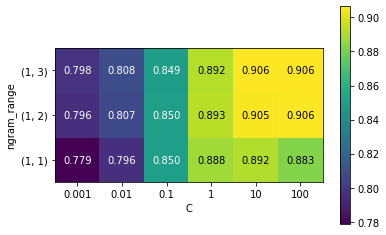

In [65]:
import matplotlib.pyplot as plt
# グリッドサーチのスコアを取り出す
scores=grid.cv_results_['mean_test_score'].reshape(-1,3).T
# ヒートマップとして可視化
heatmap=mglearn.tools.heatmap(
    scores,xlabel="C",ylabel="ngram_range",cmap="viridis",fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range']
)
plt.colorbar(heatmap)

* ヒートマップから、バイグラムを追加することで性能はかなり向上するが、トリグラムを追加しても精度の面ではごくわずかな向上しか得られないことがわかる
* モデルの改善点を理解するために、ユニグラム、バイグラム、トリグラムを含む最良のモデルに対して、重要な係数を可視化してみる

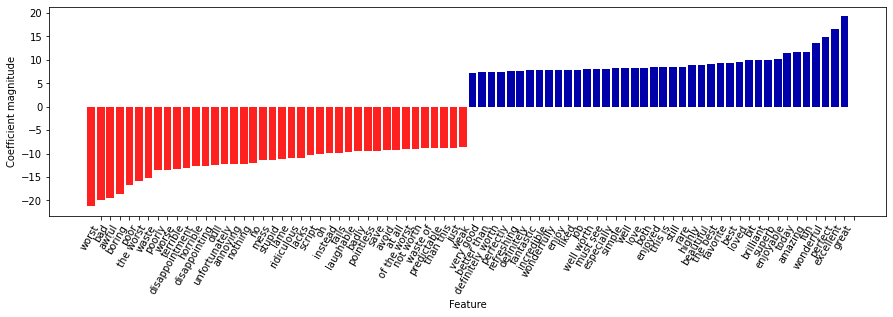

In [68]:
# 特徴量の名前と係数を取り出す
vect=grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names=np.array(vect.get_feature_names())
coef=grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef,feature_names,n_top_features=40)

* "not worth"（価値がない）が否定的な意味で、"definitely worth"（決定的な価値）、"well worth"（いいとこどり）が肯定的な意味で出てきている
* 次にトリグラムだけを可視化して、トリグラム特徴量が有効な理由を調べてみる

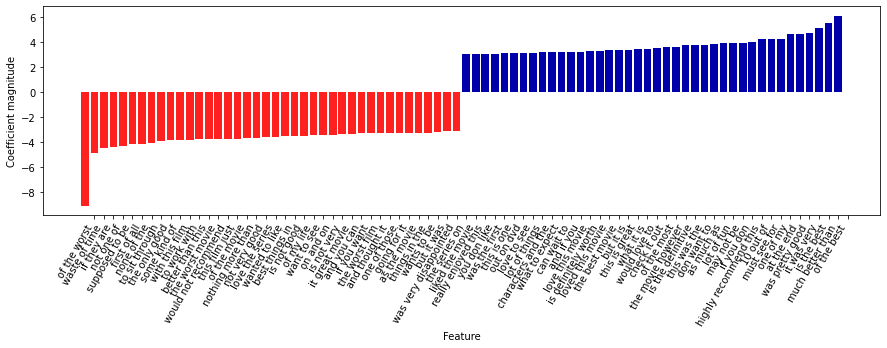

In [69]:
# トリグラム特徴量を見つける
mask=np.array([len(feature.split(" ")) for feature in feature_names])==3
# トリグラム特徴量だけを可視化
mglearn.tools.visualize_coefficients(coef.ravel()[mask],feature_names[mask],n_top_features=40)

* トリグラムのほとんどは、単独では有効でない一般的な単語で構成されている（"none of the","the only good","on and on","this is one","of the most"など）
* これらの特徴量による影響はユニグラム特徴量と比較すると限定的

## 7.8 より進んだトークン分割、語幹処理、見出し語化
* より洗練されたテキスト処理アプリケーションでよく改良されているのは、BoWモデル構築の最初の過程、すなわちトークン分割の部分であり、このステップは特徴量抽出に用いられる単語の構成を定める
* 同じ単語の単数形と複数形（または動詞における現在進行系や過去形など）が含まれていると、意味が非常に近いため、これを区別すると過剰適合が起こりやすくなり、訓練データを完全に利用できなくなってしまう
* この問題は、個々の単語を語幹（word stem）を使って表現しやれば解決し、これには同じ語幹を持つ全ての単語を特定する（融合（confalting））必要がある
* これを、単語の末尾につく特定の形を取り除くといったルールベースのヒューリスティクスで行う場合にはこれを語幹処理（stemming）と呼ぶ
* 知られている単語に対して辞書を用いて、単語の文章での役割を考慮して行う場合には見出し語化（lemmatization）と呼び、単語の表ジュウン的な形を見出し語（lemma）と呼ぶ
* 語幹処理、見出し語化はいずれも単語の正規形を取り出そうと試みる正規化（normalization）である
* 他の興味深い正規化には、スペルミスの修正などがある

In [3]:
import spacy
import nltk

# spacyの英語モデルをロード
# ロード前にコマンドラインからモデルのダウンロードが必要（"python3 -m spacy download en"を実行）
en_nlp=spacy.load("en_core_web_sm") 
# nltkのPorter stemmerのインスタンスを作成
stemmer=nltk.stem.PorterStemmer()

# spacyによる見出し語化とnltkによる語幹処理を比較する関数を定義
def compare_normalization(doc):
    # spacyで文書をトークン分割
    doc_spacy=en_nlp(doc)
    # spacyで見つけた見出し語を表示
    print("Lemmatization:")
    print([token.lemma_ for token in doc_spacy])
    # Poter stemmerで見つけたトークンを表示
    print("Stemming:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])


In [5]:
compare_normalization(
    "Our meeting today was worse than yesterday, "
    "I'm scared of meeting the clients tomorrow.")

Lemmatization:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'I', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


* 語幹処理は単語を切り縮めて語幹にすることしかしないので、"was"は"wa"になってしまう
* 見出し語化では正しい動詞の基本形の"be"となっている
* 語幹処理では2回出現する"meeting"をどちらも"meet"にしてしまっているが、見出し語化では最初の"meeting"は名刺と判断されてそのまま残り、2度めの"meeting"は動詞として"meet"とされている
* 一般に見出し語化は語幹処理よりも複雑な処理で、機械学習におけるトークンの正規化に用いると良い結果が得られる
* scikit-learnはどちらの正規化手法も実装されていないが、CountVectorizerのtokenizerパラメータで、文書をトークン列に変換するトークン分割機を指定することができる
* https://spacy.io/usage/linguistic-features#native-tokenizers

In [62]:
# CountVectorizerが用いている正規表現ベースのトークン分割機を用いて、見出し語化だけにspacyを用いるのが望ましい
# このため、en_nlp.tokenizer（spacyのトークン分割機）を、正規表現ベースのトークン分割機に置き換えている
import re
from sklearn.feature_extraction.text import CountVectorizer
from spacy.tokenizer import Tokenizer

# CountVectorizerで用いられているトークン分活用の正規表現
regexp=re.compile('(?u)\\b\\w\\w+\\b')

# spacyの言語モデルを読み込み、トークン分割機を取り出す
en_nlp=spacy.load('en_core_web_sm')
old_tokenizer=en_nlp.tokenizer

# トークン分割機を先程の正規表現で置き換える
# en_nlp.tokenizer=lambda string: old_tokenizer.tokens_from_list(regexp.findall(string))

# spacyの文書処理パイプラインを用いてカスタムトークン分割機を作る
# （正規表現を用いたトークン分割機を組み込んである）
# def custom_tokenizer(document):
#     doc_spacy=en_nlp(document)
#     return [token.lemma_ for token in doc_spacy]

# CountVectorizrをカスタムトークン分割機を使って定義する
# lemma_vect=CountVectorizer(tokenizer=custom_tokenizer,min_df=5)
lemma_vect=CountVectorizer(tokenizer=old_tokenizer,min_df=1)

In [63]:
# 見出し語化を行うCountVectorizerでtext_trainを変換
X_train_lemma=lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: {}".format(X_train_lemma.shape))
# 比較のために標準のCountVectorizerでも変換
vect=CountVectorizer(min_df=1).fit(text_train)
X_train=vect.transform(text_train)
print("X_train.shape: {}".format(X_train.shape))

X_train_lemma.shape: (25000, 6838599)
X_train.shape: (25000, 74849)


In [66]:
# データの1%だけを訓練セットとして用いてグリッドサーチを行う
from sklearn.model_selection import StratifiedShuffleSplit,GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'C':[0.001,0.01,0.1,1,10]}
cv=StratifiedShuffleSplit(n_splits=5,test_size=0.99,train_size=0.01,random_state=0)
grid=GridSearchCV(LogisticRegression(max_iter=10000),param_grid=param_grid,cv=cv)
# 標準のCountVectorizerを用いてグリッドサーチを実行
grid.fit(X_train,y_train)
print("Best cross-validation score "
"(standard CountVectorizer): {:.3f}".format(grid.best_score_))
# 見出し語化つきで、グリッドサーチを実行
grid.fit(X_train_lemma,y_train)
print("Best cross-validation score "
"(lemmatization): {:.3f}".format(grid.best_score_))

Best cross-validation score (standard CountVectorizer): 0.719
Best cross-validation score (lemmatization): 0.500


## 7.9 トピックモデリングと文書クラスタリング
* トピックモデリング（topic modeling）は、通常は教師なし学習で、それぞれの文書に対して1つ以上のトピック（topic）を割り当てるタスク
* 例えば、ニュースは「政治」「スポーツ」「金融」などのトピックに分類できる
* それぞれの文書に1つのトピックが与えられるのであれば、このタスクはクラスタリングになる
* それぞれの文書が複数のトピックを持つことができるのであれば、成分分析に関連してくる
* 多くの場合、「トピックモデリング」というと、LDA（Latetnt Dirichlet Allocation）と呼ばれる特定の成分分析手法を指す

### 7.9.1 LDA（Latent Dirichlet Allocation）
* LDAは同時に現れる頻度の高い単語の集合（トピック）を探す
* LDAはそれぞれの文書が、いくつかのトピックの「混合物」であることを要請する
* 機械学習モデルのトピックは、PCAやNMFの成分に近く、解釈できる意味を持つかもしれないが、持たないかもしれない
* LDAの「トピック」に意味があったとしても、通常の意味で用いる「トピック」とは違うかもしれない
* 教師なしのテキスト文書モデルでは、一般的な単語が解析に影響を与えすぎないように、一般的な単語を取り除いたほうが良いとされる

In [67]:
vect=CountVectorizer(max_features=10000,max_df=.15)
X=vect.fit_transform(text_train)

* まずは10トピックでトピックモデルを作ってみる
* NMFの成分と同様に、トピックには順番がないので、トピックの数を変更すると、すべてのトピックが変更されてしまう
* ここでは、デフォルトの"online"ではなく、"batch"を用いる
* こちらは少し遅いが、多くの場合結果が良くなる
* また、"max_iter"を大きい値に指定しており、これもモデルの性能に貢献する

In [69]:
from sklearn.decomposition import LatentDirichletAllocation
lda=LatentDirichletAllocation(n_components=10,learning_method="batch",max_iter=25,random_state=0)
# ここではモデルの構築と変換を一度に行う
# 変換には時間がかかるが、同時に行うことで時間を節約することができる
document_topics=lda.fit_transform(X)

* 成分分析手法と同様に、LatentDirichletAllocationには、それぞれの単語のそのトピックに対する重要性を格納したcomponents_属性がある
* components_のサイズは（n_components,n_words）

In [70]:
lda.components_.shape

(10, 10000)

In [72]:
import numpy as np
# それぞれのトピック（components_の行）に対して、特徴量を昇順でソート
# ソートを降順にするために[:,::-1]で反転
sorting=np.argsort(lda.components_,axis=1)[:,::-1]
# vectorizerから特徴量名を取得
feature_names=np.array(vect.get_feature_names())

In [74]:
import mglearn
# 最初の10トピックを表示
mglearn.tools.print_topics(topics=range(10),feature_names=feature_names,sorting=sorting,topics_per_chunk=5,n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

* わずか10のトピックでデータセット中のすべてのレビューをカバーしているので、それぞれのトピックがかなり幅広いものになっている
* 次に100トピックでモデルを作ってみる

In [75]:
lda100=LatentDirichletAllocation(n_components=100,learning_method="batch",max_iter=25,random_state=0)
document_topics100=lda100.fit_transform(X)

In [76]:
topics=np.array([7,16,24,25,28,36,37,45,51,53,54,63,89,97])

sorting=np.argsort(lda100.components_,axis=1)[:,::-1]
feature_names=np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics,feature_names=feature_names,sorting=sorting,topics_per_chunk=7,n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     performance   excellent     
suspense      awful         hitler        gets          young         role          highly        
horror        boring        nazi          guy           old           actor         amazing       
atmosphere    horrible      midnight      around        romantic      cast          wonderful     
mystery       stupid        joe           down          between       play          truly         
house         thing         germany       kill          romance       actors        superb        
director      terrible      years         goes          wonderful     performances  actors        
quite         script        history       killed        heart         played        brilliant     
bit       

* トピックについてさらに解析をすすめるには、重要な単語から得た直観をそのトピックに分類された文書を見て確認しなけれなならない

In [78]:
# "音楽関連"トピック45に対する重みでソート
music=np.argsort(document_topics100[:,45])[::-1]
# このトピックを最も重要としている5つの文書を表示
for i in music[:10]:
    # 最初の2文を表示
    print(b".".join(text_train[i].split(b".")[:2])+b".\n")

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

* トピックを調べるもう一つの方法として、それぞれのトピックが全文書に対して得た重みを見てみる

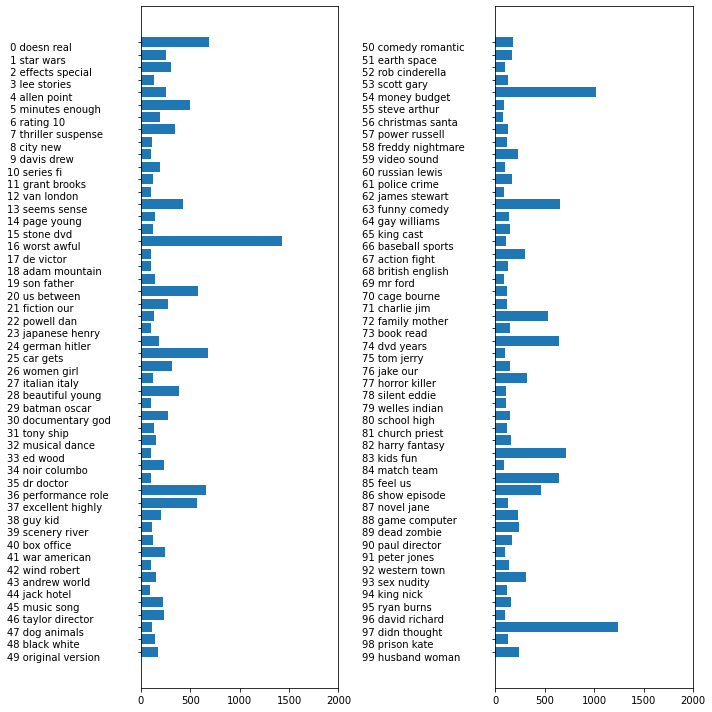

In [85]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,2,figsize=(10,10))
topic_names=["{:>2} ".format(i)+" ".join(words) for i, words in enumerate(feature_names[sorting[:,:2]])]
# 2カラムの棒グラフ
for col in [0,1]:
    start=col*50
    end=(col+1)*50
    ax[col].barh(np.arange(50),np.sum(document_topics100,axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end],ha="left",va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0,2000)
    yax=ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

* LDAは大まかに分けて、ジャンルに固有なトピックと、評価に固有なトピック、それ以外の特定しづらいトピックを見つけているように見える
* LDAのようなトピックモデルは、ラベルがない大規模なテキストコーパスを理解する興味深い方法である（もちろんラベルがある場合にも有用）
* LDAアルゴリズムはランダムなので、random_stateパラメータを変えると全く違った結果になる場合がある
* トピックを特定することは有用だが、教師なし学習モデルから導かれた結果はすべて、眉につばを付けて見る必要がある（個々のトピックの文書を実際に見て直観が正しいか確認するべき）
* LDA.transformメソッドで作られたトピック郡を教師あり学習のためのコンパクトなデータ表現とみなすこともでき、この方法はラベルのある訓練データが十分にない場合に特に有効

## 7.10 まとめと展望
* SPAM検出、詐欺検出、センチメント分析などのテキストのクラス分類タスクでは特に、BoW表現が簡単で強力な手法となる
* 機械学習では常だが、NLPアプリケーションにおいても、データ表現が非常に重要になる
* 抽出されたトークンやn-グラムを見ることで、モデルを構築する過程を深く理解することができる
* テキスト処理アプリケーションでは、モデルの中を覗いて意味のある情報を得ることができる
* 自然言語処理、テキスト処理についてさらに学びたければ、『Natural Language Processing with Python』（邦題『入門　自然言語処理』、オライリー・ジャパン）や、『Introduction to Information Retrieval』（邦題『情報検索の基礎』、共立出版）を参考にする（どちらもオンラインバージョンは無料）
* より高度なテキスト処理手法を実装するには、spacy（比較的新しいが非常に効率的で良く設計されたパッケージ）やntlk（広く用いられており完備されているが若干古いライブラリ）,gensim（トピックモデリングに充填をおいた自然言語処理パッケージ）などのPythonパッケージを用いると良い
* ワードベクタもしくは分散単語表現と呼ばれる連続値ベクタ表現を利用する手法がword2vecライブラリに実装されており、オリジナル論文「Distributed Representations of Words and Phrases and Their Compositionality」にこの手法に関する良い説明がある（spacyやgensimはこの論文で議論されている技術や、その光景技術を提供している）
* 自然言語処理のもう一つの潮流はテキスト処理にリカレントニューラルネットワーク（RNN: recurrent neural networks）を利用する方法
* 通常のニューラルネットワークによるクラス分類モデルは、テキストからクラスラベルしか生成できないが、RNNはテキストからテキストを生成することができることができるため、自動翻訳や要約に適している
* この手法に関しては、「Sequence to Sequence Learning with Neural Networks」に詳しい